# Vaccinations in California
Audrey Liu and Muriel Pokol

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

### Motivation

In early 2015, the California Department of Public Health (CDPH) was notified of a measles case in an unvaccinated child who had recently been to the Disneyland theme parks.  According to the Center for Disease Control and Prevention, there were a total of 125 measles cases that occurred from December 28 to February 8 in U.S. residents connected with the Disneyland outbreak (Zipprich, Winter et al., 2015).

The anti-vaccination movement has caused a lot of concern in the recent years, especially in California. An article released in April, 2019 in the LA Times states, “California health officials announced Thursday that 38 people had been infected with measles so far this year, a tally expected to rise.” There are clearly already societal repercussions due to the low percentage of vaccinations. An article published by the National Review has an exceptionally clear statement on the problem.  “California has been the epicenter for anti-vaccine sentiment, and measles outbreaks, for the last several years. That’s not a coincidence; the former fuels the latter... for those too young or medically fragile to vaccinate, a vaccine-preventable illness could be absolutely catastrophic” (Mandel, 2019).


We believe calling the consequences of anti-vaccination catastrophic is not an exaggeration. Before measles vaccine was invented, 3 to 4 million people in the U.S. were affected by measles each year (CDC, 2018).  No one would want to have their children affected by a vaccine preventable disease. Yet the presence of a anti-vaccine sentiments has only grown stronger in recent years. Some places are dipping below herd immunity for vaccine-preventable diseases, which is a way of protecting a "herd", or community, from disease by immunizing enough of the population.  For example, we are only immune to the measles as a herd if 95% of us are vaccinated. We wanted to learn more about the negative sentiments surrounding the possibility of fatal diseases returning.  We’ve chosen our dataset of vaccination rates among children in California schools because schools near Los Angeles, California are most notable for having an anti-vaccine population. We hope to use this dataset to identify what kind of people are more anti-vaccine, which counties are most at-risk of dipping below herd immunity for multiple vaccinations, and which vaccinations are the major concerns for anti-vaccinators.  

### Related Work

One reason for fewer children being vaccinated is concern surrounding a theory that the measles-mumps-rubella (MMR) immunization for young children causes an increase in the chance of autism.  Over the course of time, the fear that vaccines could cause autism has become a part of anti-vaccination rhetoric despite there being no replicated studies that demonstrate causation, not just correlation.  The concern that the MMR vaccination could somehow increase the rate of autism in children is addressed in Dales et al.’s paper, Time Trends in Autism and in MMR Immunization Coverage in California.  Their analysis did not suggest any association between MMR immunization among young children and an increase in autism occurrence (Dales et al.).

Another very interesting paper on vaccination levels is Improving MMR vaccination rates: herd immunity is a realistic goal by Cockman et al.  This paper looks at low vaccination rates in London, England and how effective different strategies were to increase those rates over time.  They were successful in raising the percentage of vaccinated children in London, but their strategies primarily targeted health networks and not the concept that vaccinations cause harm (Cockman et al.).  The paper discusses the importance of increasing vaccination rates and developing strategies to reach herd immunity to such deadly diseases.

The ideologies behind both papers mentioned above are shared with the United States Center for Disease Control and Prevention (CDC).  Published on their website is a statement regarding the safety of vaccines and the findings that vaccinations have no true relationship with autism spectrum disorder (CDC Statement).  There is also a CDC study and a review by the Institute of Medicine confirming the lack of relationship between the autism spectrum disorder and vaccinations (CDC Statement).  The CDC emphasizes the importance of protecting children from such high-risk diseases when it’s well-within our ability.  

# Data Processing

### Read in the file and get a good understanding of the raw data

Data was downloaded from Kaggle.com, but the information was originally published by the California Department of Public Health.

In [2]:
raw = pd.read_csv("StudentData.csv", header=0)

In [3]:
raw.head().T

,0,1,2,3,4
schoolType,PRIVATE,PRIVATE,PRIVATE,PRIVATE,PRIVATE
COUNTY,ALAMEDA,ALAMEDA,ALAMEDA,ALAMEDA,ALAMEDA
SCHOOL,A CHILD'S WORLD MONTE,ACAD,ACTS CHRISTIAN ACADEM,ACTS CHRISTIAN ACADEM,ACTS CHRISTIAN ACADEM
school_code,7092463,6972533,7082266,7082266,7082266
n,12,15,19,23,27
nMMR,12,15,17,6,27
nDTP,11,15,17,22,27
nPolio,9,15,17,23,27
nPBE,0,0,0,0,0
nPME,0,0,0,0,0


### Data Cleaning

Replace the raw numbers with percentages of vaccination types/exemption types and rename columns to represent that change.

In [4]:
vacc_df = raw

# change number of students to percentage of students
vacc_df['nMMR'] = vacc_df.nMMR/vacc_df.n * 100
vacc_df['nDTP'] = vacc_df.nDTP/vacc_df.n * 100
vacc_df['nPolio'] = vacc_df.nPolio/vacc_df.n * 100
vacc_df['nPBE'] = vacc_df.nPBE/vacc_df.n * 100
vacc_df['nPME'] = vacc_df.nPME/vacc_df.n * 100
vacc_df = vacc_df.round(2)

# rename columns for clarity
vacc_df.columns = ['school_type', 'county', 'school', 'school_code', 'n', 
                   'MMR_percent', 'DTP_percent', 'Polio_percent',
                   'PBE_percent', 'PME_percent', 'year']

In [5]:
vacc_df.head()

,school_type,county,school,school_code,n,MMR_percent,DTP_percent,Polio_percent,PBE_percent,PME_percent,year
0,PRIVATE,ALAMEDA,A CHILD'S WORLD MONTE,7092463,12,100.00,91.67,75.00,0.0,0.0,2000
1,PRIVATE,ALAMEDA,ACAD,6972533,15,100.00,100.00,100.00,0.0,0.0,2000
2,PRIVATE,ALAMEDA,ACTS CHRISTIAN ACADEM,7082266,19,89.47,89.47,89.47,0.0,0.0,2009
3,PRIVATE,ALAMEDA,ACTS CHRISTIAN ACADEM,7082266,23,26.09,95.65,100.00,0.0,0.0,2010
4,PRIVATE,ALAMEDA,ACTS CHRISTIAN ACADEM,7082266,27,100.00,100.00,100.00,0.0,0.0,2006


Remove unnecessary columns and melt columns to get a cleaner dataset for analysis, additionally creating vaccine-only and exemption-only datasets, focusing on School Type.

In [6]:
vacc_melt_school_type = vacc_df.drop(['county', 'n', 'school', 'school_code'], axis=1)

# Melt dataframe to get a vaccine_type column instead of multiple vaccine columns
vacc_melt_school_type = pd.melt(vacc_melt_school_type, 
                                id_vars=["year", "school_type"], 
                                var_name="vaccine_type", 
                                value_name="percentage")

# Remove exemptions as vaccine types, leaving vaccines
melt_vaccines = vacc_melt_school_type[(vacc_melt_school_type['vaccine_type'] != 'PBE_percent') & \
                                      (vacc_melt_school_type['vaccine_type'] != 'PME_percent')]

# Remove vaccines as vaccine types, leaving exemptions
melt_exemptions = vacc_melt_school_type[(vacc_melt_school_type['vaccine_type']=='PBE_percent') | \
                                        (vacc_melt_school_type['vaccine_type']=='PME_percent')]

In [7]:
vacc_melt_school_type.head()

,year,school_type,vaccine_type,percentage
0,2000,PRIVATE,MMR_percent,100.00
1,2000,PRIVATE,MMR_percent,100.00
2,2009,PRIVATE,MMR_percent,89.47
3,2010,PRIVATE,MMR_percent,26.09
4,2006,PRIVATE,MMR_percent,100.00


Remove unnecessary columns and melt columns to get a cleaner dataset for analysis, focusing on County.

In [8]:
vacc_melt_county = vacc_df.drop(['school_type', 'n', 'school', 'school_code'], axis=1)

# Melt dataframe to get a vaccine_type column instead of multiple vaccine columns
vacc_melt_county = pd.melt(vacc_melt_county, 
                           id_vars=["year", "county"], 
                           var_name="vaccine_type", 
                           value_name="percentage")

# Begin EDA
### Our Concerns: Who, what, where, and when?
Our top concerns about the anti-vaccine issue are who, what, where, and when. Who primarily makes up the anti-vaccine population? Which vaccinations are exempted most often? Where in California is the anti-vaccine sentiment the most prominent, or does location (community) matter at all? When did the anti-vaccine movement pick up attraction?

The data we primarily want to focus on for these questions is the following:
<br>1. School type  <br>2. Vaccination type  <br>3. County  <br>4. Year (Here we focus on the growth rate of using vaccination in terms of school type and vaccination type)  

### 1. School Type

In [9]:
# create pivot table for average vaccination percentages by school type and year
vacc_per_y_per_type = pd.pivot_table(vacc_melt_school_type, 
                                     values='percentage', 
                                     index=['school_type', 'year'],
                                     columns=['vaccine_type'], 
                                     aggfunc=np.mean)
vacc_per_y_per_type

vaccine_type      DTP_percent  MMR_percent  PBE_percent  PME_percent  \
school_type year                                                       
PRIVATE     2000    92.709480    91.672623     1.453353     0.115821   
            2001    93.192043    92.467009     1.724335     0.140489   
            2002    93.694108    92.940184     1.760072     0.145987   
            2003    92.453708    91.835355     2.148624     0.145988   
            2004    92.404361    92.041754     2.285089     0.193966   
            2005    91.672347    91.064295     2.546323     0.199198   
            2006    91.522014    91.191829     2.525729     0.222576   
            2007    90.756528    90.532103     2.810738     0.250086   
            2008    91.007156    90.392526     3.479838     0.215000   
            2009    89.703462    89.243641     3.986157     0.283432   
            2010    89.238333    88.291353     4.291763     0.206111   
            2011    89.803017    88.914904     4.804207     0.271761   
            2012    89.005551    87.787776     5.191524     0.262571   
            2013    88.997561    87.922539     5.772604     0.267582   
            2014    88.978566    88.639244     5.470764     0.266297   
PUBLIC      2000    95.229002    95.384546     0.932414     0.135055   
            2001    94.799961    94.901156     1.521719     0.162577   
            2002    94.889354    95.339229     1.447459     0.180809   
            2003    94.782580    95.123906     1.447751     0.150072   
            2004    94.745509    95.115170     1.564871     0.159569   
            2005    94.507295    94.987957     1.637496     0.170460   
            2006    94.223599    94.566458     1.761014     0.183081   
            2007    93.733467    94.236833     1.926173     0.188638   
            2008    93.085532    93.577911     2.278754     0.205901   
            2009    92.580818    93.208212     2.364148     0.203752   
            2010    92.580657    92.651458     2.699468     0.190775   
            2011    92.354901    92.759627     2.674977     0.159681   
            2012    91.945961    92.242911     3.141348     0.155425   
            2013    91.544004    91.762461     3.557262     0.184620   
            2014    91.938914    92.096352     2.838563     0.197346   

vaccine_type      Polio_percent  
school_type year                 
PRIVATE     2000      93.081449  
            2001      93.481309  
            2002      93.782548  
            2003      92.519453  
            2004      92.499957  
            2005      91.502108  
            2006      91.250520  
            2007      90.532493  
            2008      91.059925  
            2009      89.627198  
            2010      89.486087  
            2011      89.558882  
            2012      88.712726  
            2013      88.818369  
            2014      89.248739  
PUBLIC      2000      95.876813  
            2001      95.397448  
            2002      95.531561  
            2003      95.211436  
            2004      95.153978  
            2005      94.867425  
            2006      94.588525  
            2007      94.095070  
            2008      93.567182  
            2009      93.148800  
            2010      92.144719  
            2011      92.603740  
            2012      92.036674  
            2013      92.025878  
            2014      92.555266

#### 1.1 Percentage of Student taken Vaccination per School type

Each vaccine type has a similar distribution rate of students taking it, however the private schools seem to have a slightly broader distribution than public schools for all vaccine types.

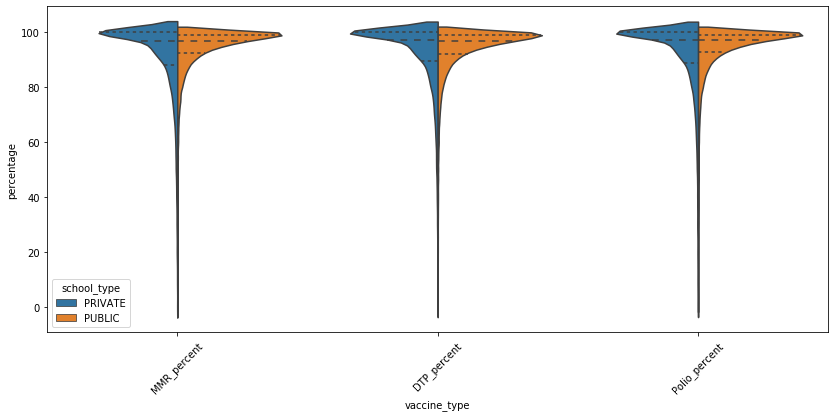

In [10]:
Public = (melt_vaccines.school_type == 'PUBLIC')
Private = (melt_vaccines.school_type == 'PRIVATE')

plt.figure(figsize=(14, 6))

with sns.axes_style(style=None):
    sns.violinplot("vaccine_type", "percentage", hue="school_type", data=melt_vaccines,
                   split=True, inner="quartile")
    plt.xticks(rotation=45)
    plt.show()

##### 1.2 Percentage of Student taking Vaccination per Vaccine Type per Year
Each vaccine type has a similar amount of students taking it. Polio has, among the three, more students receiving the vaccination, while MMR has the least.  

/Users/audreyliu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


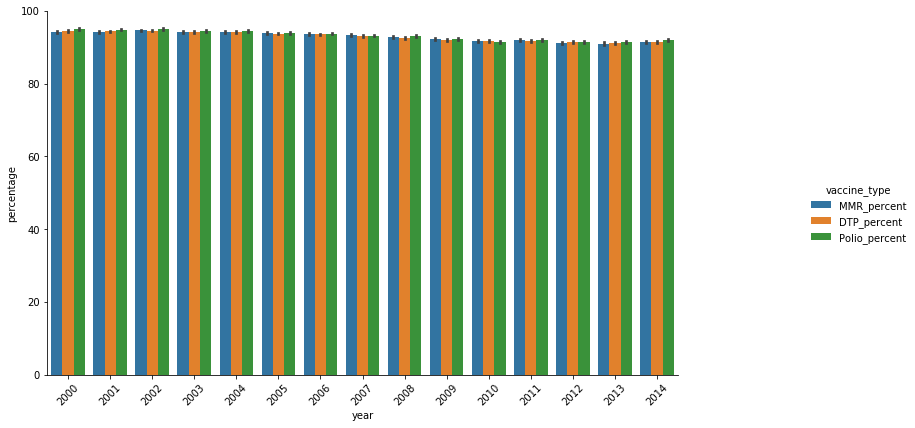

In [15]:
g = sns.catplot(x='year', y='percentage', hue='vaccine_type', data=melt_vaccines, kind='bar')
plt.xticks(rotation=45)

g.fig.set_figheight(6)
g.fig.set_figwidth(14)

plt.show()

##### 1.3 Average Vaccination per Vaccine Type per School Type For All Years
Polio has the highest average percentage for students recieving it across both school types, while MMR is the lowest for Private and DTP is lowest in Public. Meanwhile, public shool has in general larger proportions of students vaccinated than the private school and a more even spread of vaccinators for each type of vaccine.

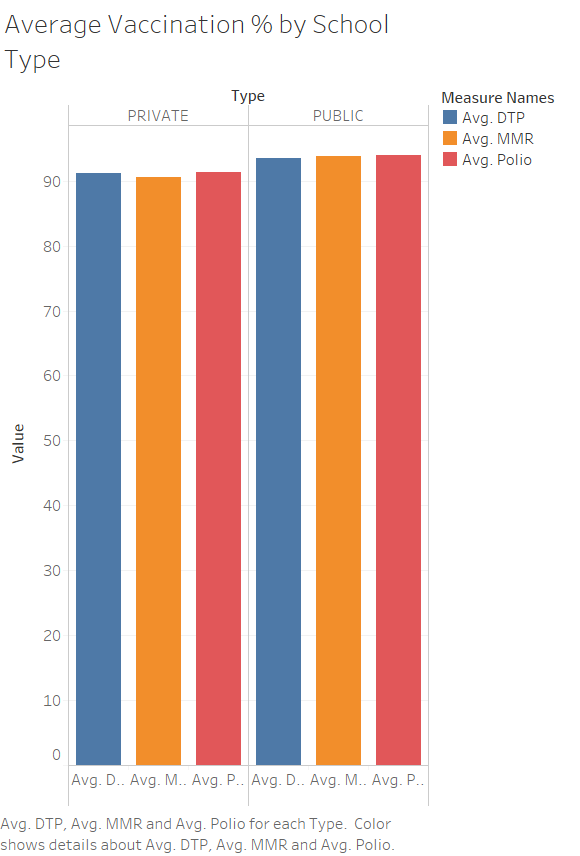

In [16]:
img = 'Avg Vaccination by School Type.png'
Image(filename=img)

##### 1.4.a Personal Belief Exemption per School Type (Graph 1)
Personal belief exemptions are much more condensed towards 0% for public schools, while private schools have spikes of schools with personal belief exemptions around 20%, and the density plot for private is less skewed. 

/Users/audreyliu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


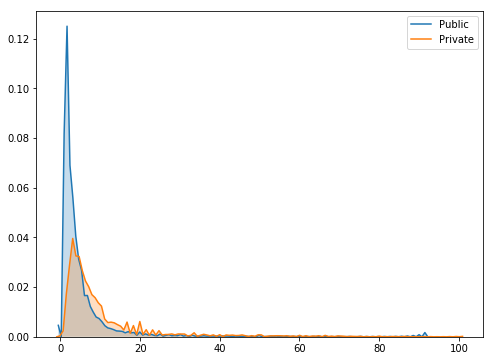

In [17]:
plt.figure(figsize=(8, 6))

private_df = vacc_df[vacc_df.school_type == "PRIVATE"]
public_df = vacc_df[vacc_df.school_type == "PUBLIC"]

sns.kdeplot(public_df['PBE_percent'], shade=True, label="Public")
sns.kdeplot(private_df['PBE_percent'], shade=True, label="Private")

plt.show()

##### 1.4.b Persoanl Belief Exemption per School Type (Graph 2)
We see over time that personal belief exemtpions have broadened in distribution as more and more children recieve them, especially for private schools.

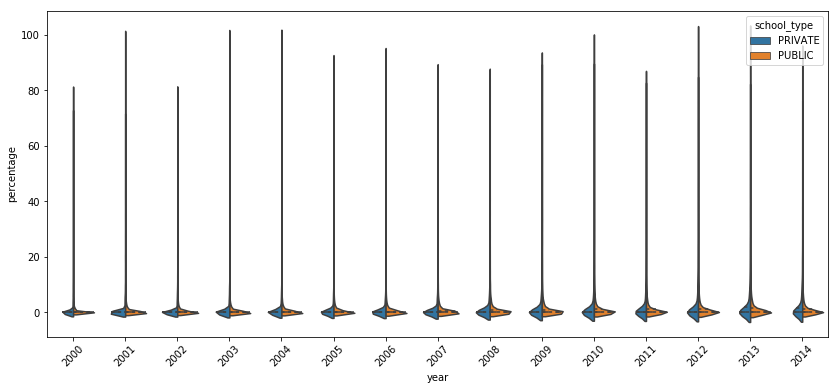

In [18]:
plt.figure(figsize=(14, 6))

Public = (melt_exemptions.school_type == 'PUBLIC')
Private = (melt_exemptions.school_type == 'PRIVATE')

with sns.axes_style(style=None):
    sns.violinplot("year", "percentage", hue="school_type", data=melt_exemptions,
                   split=True, inner="quartile")
    plt.xticks(rotation=45)
    plt.show()

##### 1.5 Personal Belief Exemption per School Type for All Year
Personal belief exemptions have much higher percentages than medical exemptions, and while the distriution looks fairly similar for comparing public and private personal belief exemptions, the top quartile is higher.

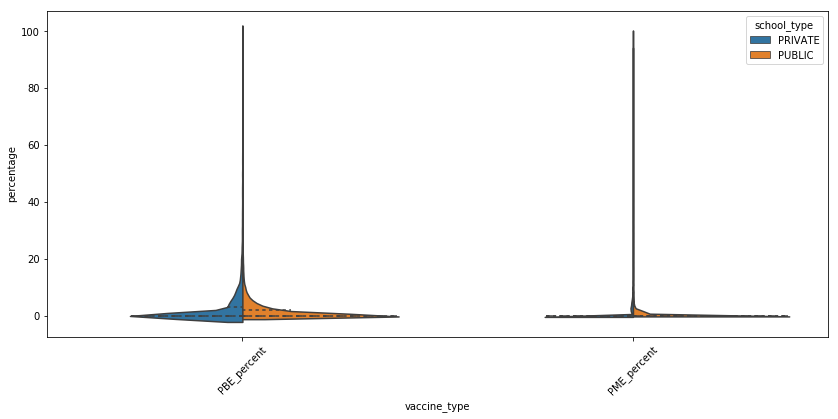

In [19]:
plt.figure(figsize=(14, 6))

Public = (melt_exemptions.school_type == 'PUBLIC')
Private = (melt_exemptions.school_type == 'PRIVATE')

with sns.axes_style(style=None):
    sns.violinplot("vaccine_type", "percentage", hue="school_type", data=melt_exemptions,
                   split=True, inner="quartile")
    plt.xticks(rotation=45)
    plt.show()

##### 1.6 Average Personal Belief Exemption per School Type for All Year
In total, private schools have much higher percentages of personal belief exemptions than private school, while the medical exemption belief is about the same for both school types.

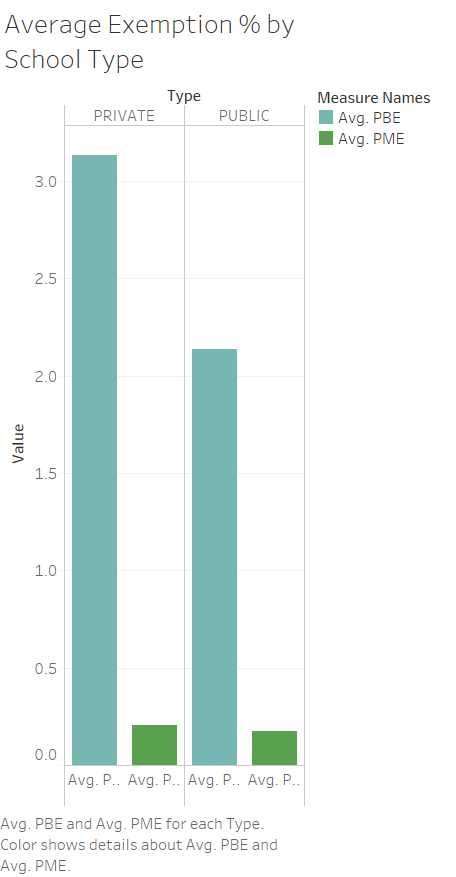

In [20]:
img = 'Avg Exemption by School Type.png'
Image(filename=img)

### School Type Conclusion
We originally hypothesized that families who choose to send their children to a private school would have a preference for a non-traditional upbringing, and that those preferences might carry over into non-traditional beliefs about vaccination, leading to lower vaccination rates and higher rates of personal belief exemptions in private schools.  We do see this to be the case, here.

### 2. Vaccination Type

In [21]:
vacc_per_y = pd.pivot_table(vacc_melt_school_type, 
                            values='percentage', 
                            index=['year'],
                            columns=['vaccine_type'], 
                            aggfunc=np.mean)
vacc_per_y

vaccine_type,DTP_percent,MMR_percent,PBE_percent,PME_percent,Polio_percent
year,,,,,
2000,94.438977,94.220630,1.095760,0.129024,95.000294
2001,94.300568,94.145149,1.584648,0.155717,94.802326
2002,94.531327,94.620614,1.541100,0.170378,95.007658
2003,94.117053,94.184128,1.648041,0.148905,94.442141
2004,94.085560,94.248802,1.767894,0.169265,94.405833
2005,93.735386,93.919609,1.884955,0.178285,93.951106
2006,93.511517,93.676974,1.962577,0.193491,93.708695
2007,92.972227,93.289488,2.152367,0.204351,93.184076
2008,92.584265,92.809653,2.568434,0.208096,92.962476


##### 2.1.a Shot Type by Year (Graph 1)

Looking at the graph, we can see that all shot types are experiencing less vaccinators over the course of the year, and that Polio is general is more popular among the other two.

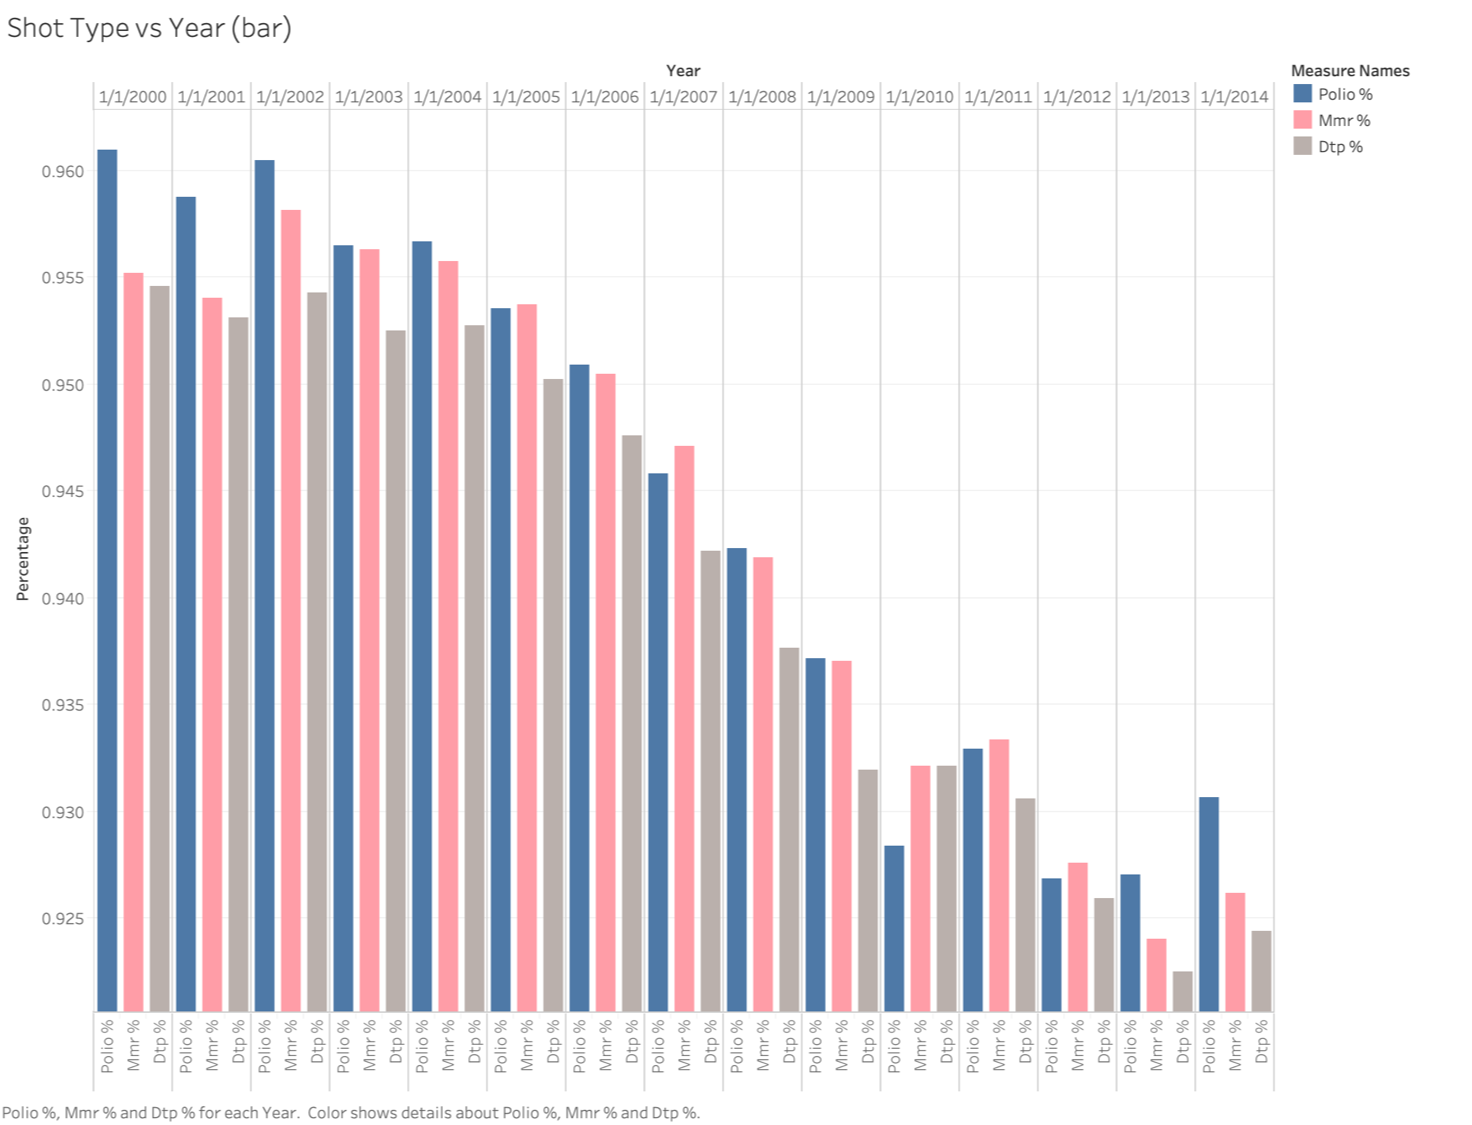

In [22]:
img = 'shot_type_per_year.png'
Image(filename=img)

##### 2.1.b Shot Type by Year (Graph 2)

We outline the trend of each shot type in the line graph below. We found that in addition to the fact that Polio is the more popular vaccine, it is acutally experience a deeper dig that MMR and DTP, especially from 2009 to 2012.

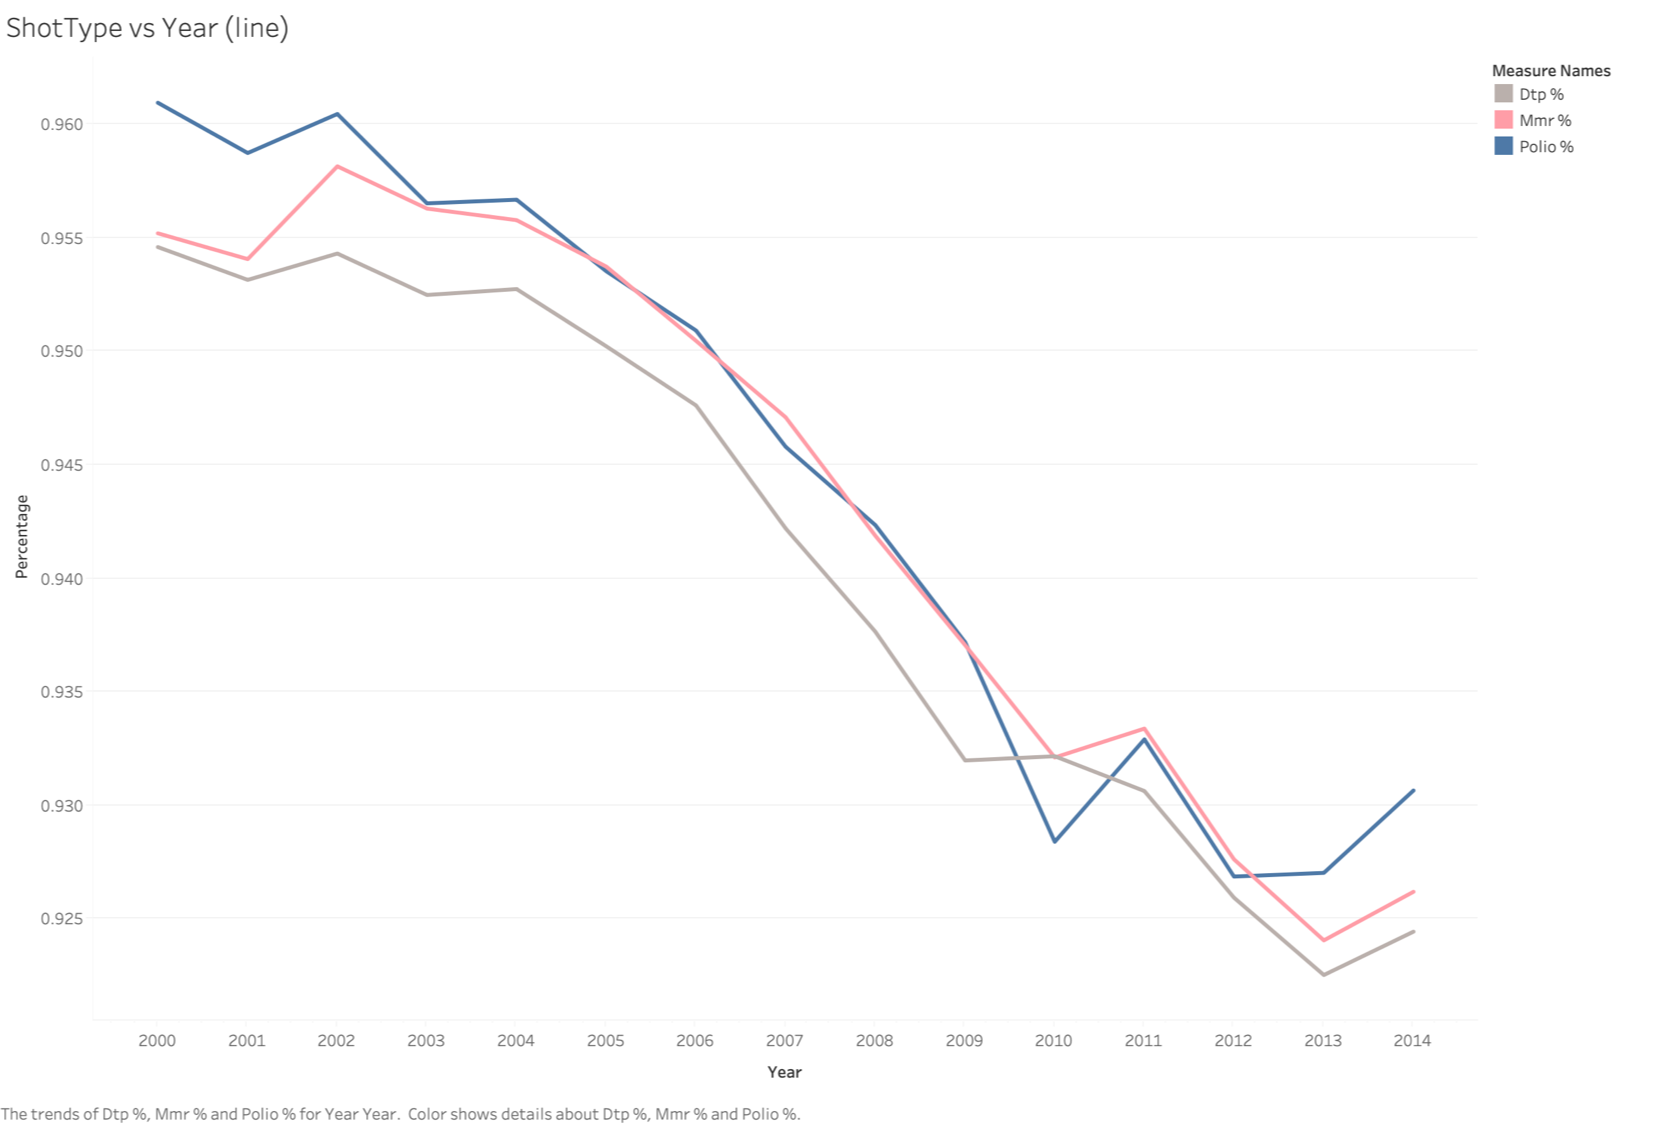

In [23]:
img = 'shot_type_per_year2.png'
Image(filename=img)

##### 2.2 Shot Type in Total
In general, the average portion of vaccinators in each school is about 93%.

In [24]:
vaccines = ['MMR_percent', 'DTP_percent', 'Polio_percent']
vaccs_only = vacc_melt_school_type[vacc_melt_school_type.vaccine_type.isin(vaccines)]
vaccs_only.percentage.mean()

93.04063047938965

##### 2.3 Shot Type by Density

Personal belief exemptions are far more common than medical exemptions, while the polio vaccine is overall the most skewed towards 100%.

/Users/audreyliu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


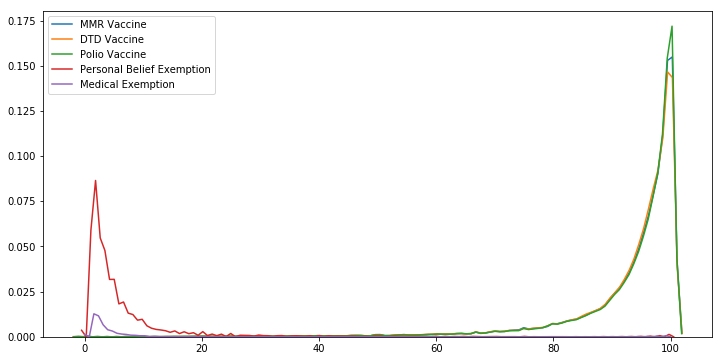

In [25]:
plt.figure(figsize=(12, 6))

sns.kdeplot(vacc_df['MMR_percent'], label="MMR Vaccine")
sns.kdeplot(vacc_df['DTP_percent'], label="DTD Vaccine")
sns.kdeplot(vacc_df['Polio_percent'], label="Polio Vaccine")
sns.kdeplot(vacc_df['PBE_percent'], label="Personal Belief Exemption")
sns.kdeplot(vacc_df['PME_percent'], label="Medical Exemption")

plt.show()

### School Type Conclusion
Polio has the highest average percentage for students recieving it, while DTP is overall the lowest. Meanwhile, personal belief exemptions' average percentage is much higher than the average percentage for medical exemptions.

### 3. County

In [26]:
vacc_per_y_per_county = pd.pivot_table(vacc_melt_county, 
                                       values='percentage', 
                                       index=['county'],
                                       columns=['vaccine_type'], 
                                       aggfunc=np.mean)
vacc_per_y_per_county

vaccine_type,DTP_percent,MMR_percent,PBE_percent,PME_percent,Polio_percent
county,,,,,
ALAMEDA,92.510009,92.987558,1.420055,0.152157,92.845082
ALPINE,90.100000,90.100000,4.715000,0.000000,90.100000
AMADOR,94.239899,94.352323,3.751212,0.101212,94.773838
BUTTE,89.464691,89.253413,5.195913,0.305983,89.953048
CALAVERAS,84.227152,84.833273,8.292909,0.243152,84.484788
COLUSA,96.384405,96.394286,1.181548,0.060595,97.005833
CONTRA COSTA,94.887098,95.086099,2.049174,0.207514,95.073782
DEL NORTE,89.715197,90.155748,6.399291,0.230945,90.149213
EL DORADO,87.937390,87.823860,7.131654,0.265368,87.973824


#### 3.1 Average Vaccination per Vaccine Type per County

Blue circle : DTP <br>
Orange circle : MMR <br>
Red circle : Polio <br>
Sky blue circle : PBE <br>
Green circle : PME <br> 
County wise, we found that Imperial, Marin, Mariposa, Mendocino, Modoc, Mono, Nevada, Orange, Placer, Santa Cruz, Theama, Tuolumne has MMR as the lowest popular vaccine, whereas the other Counties has DTP as the least favored vaccine.

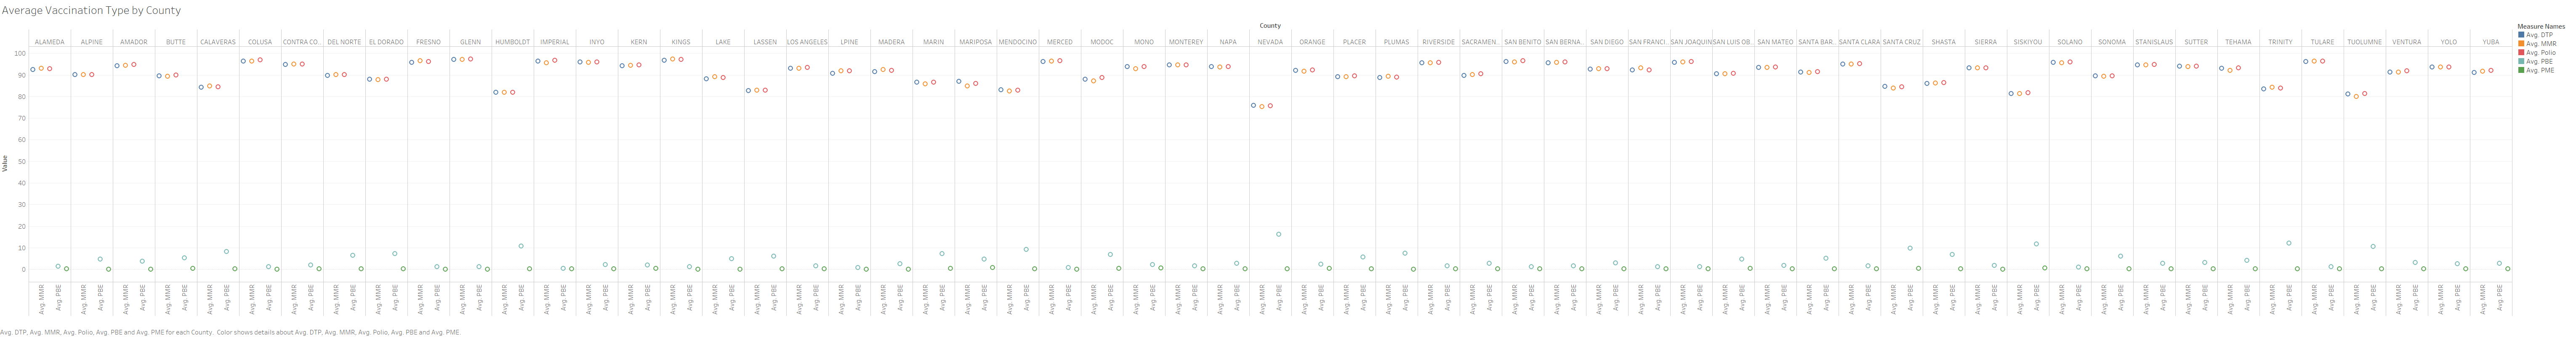

In [27]:
img = 'Avg Vaccination Type by County.png'
Image(filename=img)

#### 3.2 Total Personal Belief Exemption per County
In total, we found that Northern California has more counties that with high personal belief exemption percentages. Within which Nevada has the largest percentage. In addition, many of the counties that do not farvored MMR, such as Mono, Modoc, Tehama also do not favor vaccines in general.

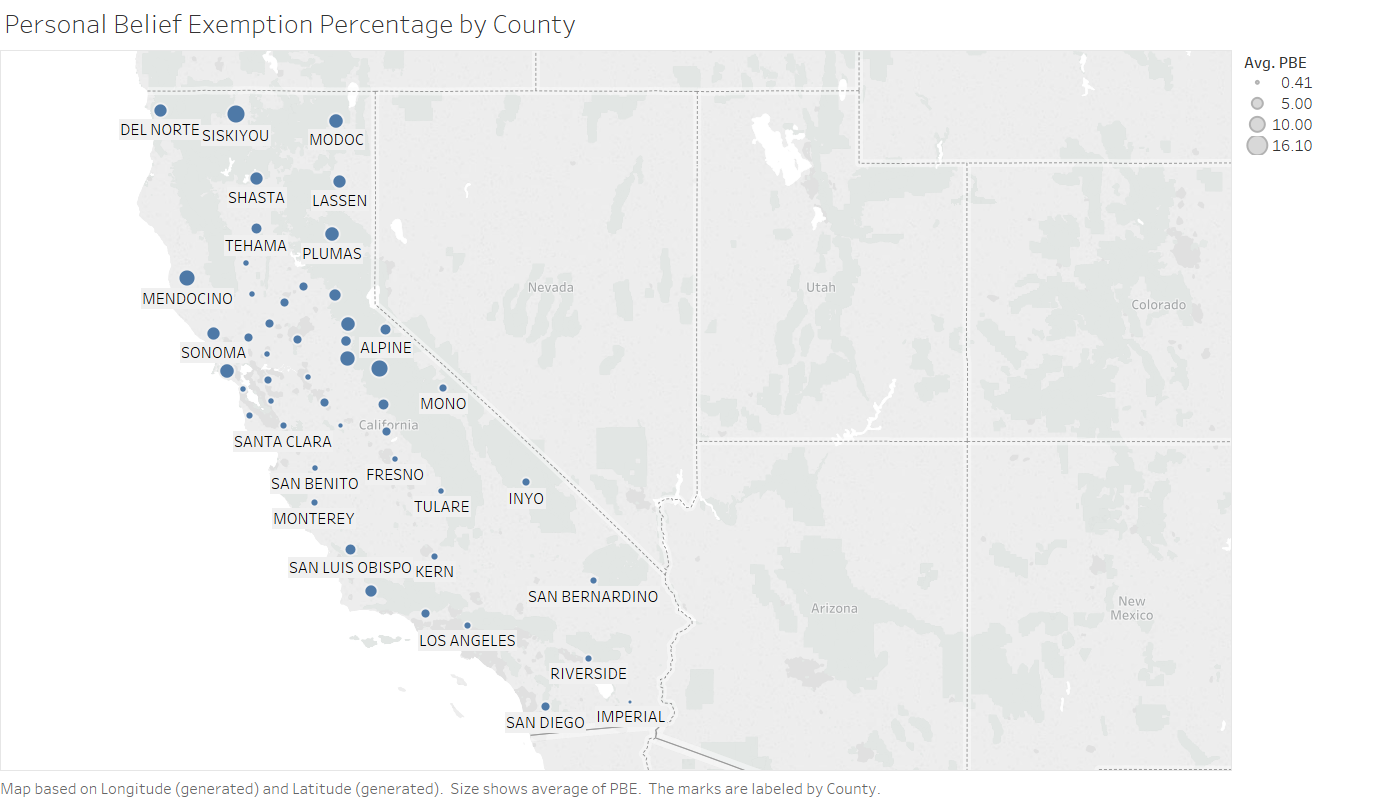

In [29]:
img = 'PBE Percentage by County.png'
Image(filename=img)

In [28]:
vacc_per_y_per_county = pd.pivot_table(vacc_melt_county, 
                                       values='percentage', 
                                       index=['county'],
                                       columns=['vaccine_type'], 
                                       aggfunc=np.mean).sort_values(by='PBE_percent', ascending=False)
vacc_per_y_per_county.head()

vaccine_type,DTP_percent,MMR_percent,PBE_percent,PME_percent,Polio_percent
county,,,,,
NEVADA,75.932585,75.326123,16.104462,0.185046,75.729262
TRINITY,83.403582,84.212239,12.142985,0.250448,83.802239
SISKIYOU,81.356701,81.392944,11.769797,0.564010,81.732690
HUMBOLDT,81.846495,81.850440,10.708789,0.252183,81.860073
TUOLUMNE,81.064208,79.930710,10.469071,0.163005,81.298852


We then take a deeper look into why Nevada, Siskiyou, and Trinity county have relatively less vaccinators. It appears, that for Siskiyou, there are some exmeption that are due to medical concern. Whereas for Nevada adn Trinit county (esp. Nevada), the personal exemption portion goes up to as high as 17%.

/Users/audreyliu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


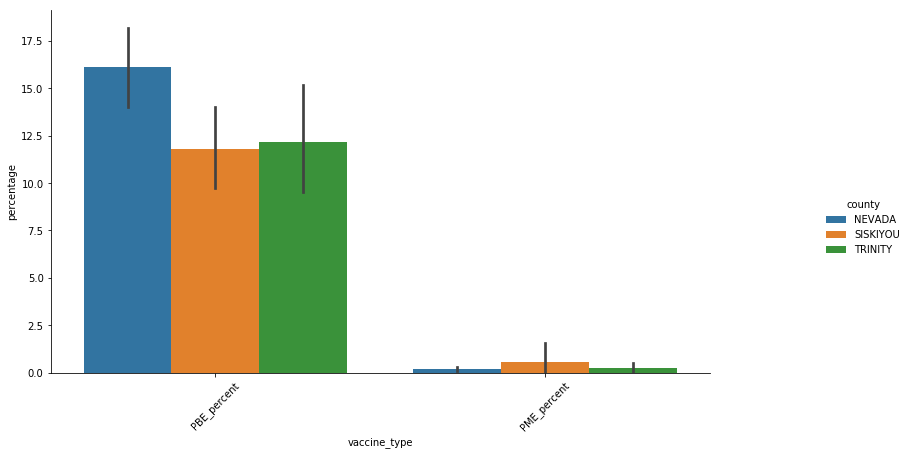

In [30]:
melt_exemptions2 = vacc_melt_county[(vacc_melt_county['vaccine_type']=='PBE_percent') | \
                                    (vacc_melt_county['vaccine_type']=='PME_percent')]

melt_exemptions2 = melt_exemptions2[(melt_exemptions2['county']=="NEVADA") | \
                                    (melt_exemptions2['county']=='TRINITY') | \
                                    (melt_exemptions2['county']=='SISKIYOU')]

g = sns.catplot(x='vaccine_type', y='percentage', hue='county', data=melt_exemptions2, kind='bar')
plt.xticks(rotation=45)

g.fig.set_figheight(6)
g.fig.set_figwidth(14)

plt.show()

Further looking into the school type composition of these three counties, we see that Nevada has 14% school that is private, far surpassing Siskiyou of .5% and Trinity of 0%.

In [31]:
vacc_df_NEVADA = vacc_df[vacc_df['county']=='NEVADA'] 
vacc_df_SISKIYOU = vacc_df[vacc_df['county']=='SISKIYOU'] 
vacc_df_TRINITY = vacc_df[vacc_df['county']=='TRINITY'] 

pd.DataFrame({'Nevada': vacc_df_NEVADA['school_type'].value_counts(normalize=True) * 100,
              'Siskiyou': vacc_df_SISKIYOU['school_type'].value_counts(normalize=True) * 100,
              'Trinity': vacc_df_TRINITY['school_type'].value_counts(normalize=True) * 100})

,Nevada,Siskiyou,Trinity
PRIVATE,14.153846,0.507614,NaN
PUBLIC,85.846154,99.492386,100.0


### County Conclusion
In looking at county data, we find that most schools with larger personal belief exemption percentage are in Northern California.  We found Nevada County to have the largest average of personal belief exemptions for all of its schools, and when broken down by school type compared to the other two counties with large personal belief exemptions, we see that it has a significantly higher proportion of private schools.

### 4. Year (growth rate)

In [32]:
### Each vaccination taken per year  
vaccines = ['MMR_percent', 'DTP_percent', 'Polio_percent']
vaccs_only = vacc_melt_school_type[vacc_melt_school_type.vaccine_type.isin(vaccines)]

vacc_per_y2 = pd.pivot_table(vaccs_only, 
                            values='percentage', 
                            index=['year'],
                            columns=['vaccine_type'], 
                            aggfunc=np.mean, margins=True)

###Growth rate per year for vaccination in general
growth_rate = pd.DataFrame()
growth_rate["total_DIFF"] = vacc_per_y2.All/vacc_per_y2.All.shift() -1


###Growth rate per year for differnt shot type
growth_rate["MMR_DIFF"] = vacc_per_y.MMR_percent/vacc_per_y.MMR_percent.shift() - 1
growth_rate["DTP_DIFF"] = vacc_per_y.DTP_percent/vacc_per_y.DTP_percent.shift() - 1
growth_rate["Polio_DIFF"] = vacc_per_y.Polio_percent/vacc_per_y.Polio_percent.shift() - 1


###Growth rate per year for different school type
vacc_per_y_per_type = vacc_per_y_per_type.reset_index().set_index("year")
vacc_per_y_per_type["All"] = (vacc_per_y_per_type["MMR_percent"] + \
                              vacc_per_y_per_type["DTP_percent"] + \
                              vacc_per_y_per_type["Polio_percent"] )/3

growth_rate["PRI_DIFF"] = vacc_per_y_per_type.All.iloc[0:15]/              \
                   vacc_per_y_per_type.All.iloc[0:15].shift() -1
growth_rate["PUB_DIFF"] = vacc_per_y_per_type.All.iloc[15:]/               \
                    vacc_per_y_per_type.All.iloc[15:].shift() -1


growth_rate[:-1]

,total_DIFF,MMR_DIFF,DTP_DIFF,Polio_DIFF,PRI_DIFF,PUB_DIFF
year,,,,,,
2000,NaN,NaN,NaN,NaN,NaN,NaN
2001,-0.001452,-0.000801,-0.001466,-0.002084,0.006043,-0.004858
2002,0.003218,0.005050,0.002447,0.002166,0.004573,0.002321
2003,-0.004984,-0.004613,-0.004382,-0.005952,-0.012868,-0.002247
2004,-0.000011,0.000687,-0.000335,-0.000384,0.000497,-0.000362
2005,-0.004011,-0.003493,-0.003722,-0.004817,-0.009776,-0.002288
2006,-0.002517,-0.002583,-0.002388,-0.002580,-0.001001,-0.003461
2007,-0.005167,-0.004136,-0.005767,-0.005598,-0.007823,-0.004634
2008,-0.003898,-0.005144,-0.004173,-0.002378,0.002349,-0.006505


#### 4.1 Growth Rate of Vaccinated Student per year

The growth rate of vaccinators per year shows a very consistent negative growth except for a few years. In other words, the vaccinators is decreasing constantly. However, the negative growth rate is relatively bumpy. Meaning that, even though in some year, the vaccinators amount was decreasing quickly, there were some other years the vaccinators amount was dicreasing slowly. This shows that at least this anti-vaccine sentiment is not escalating, and that parents do not all rush to exempt their children for vaccination.

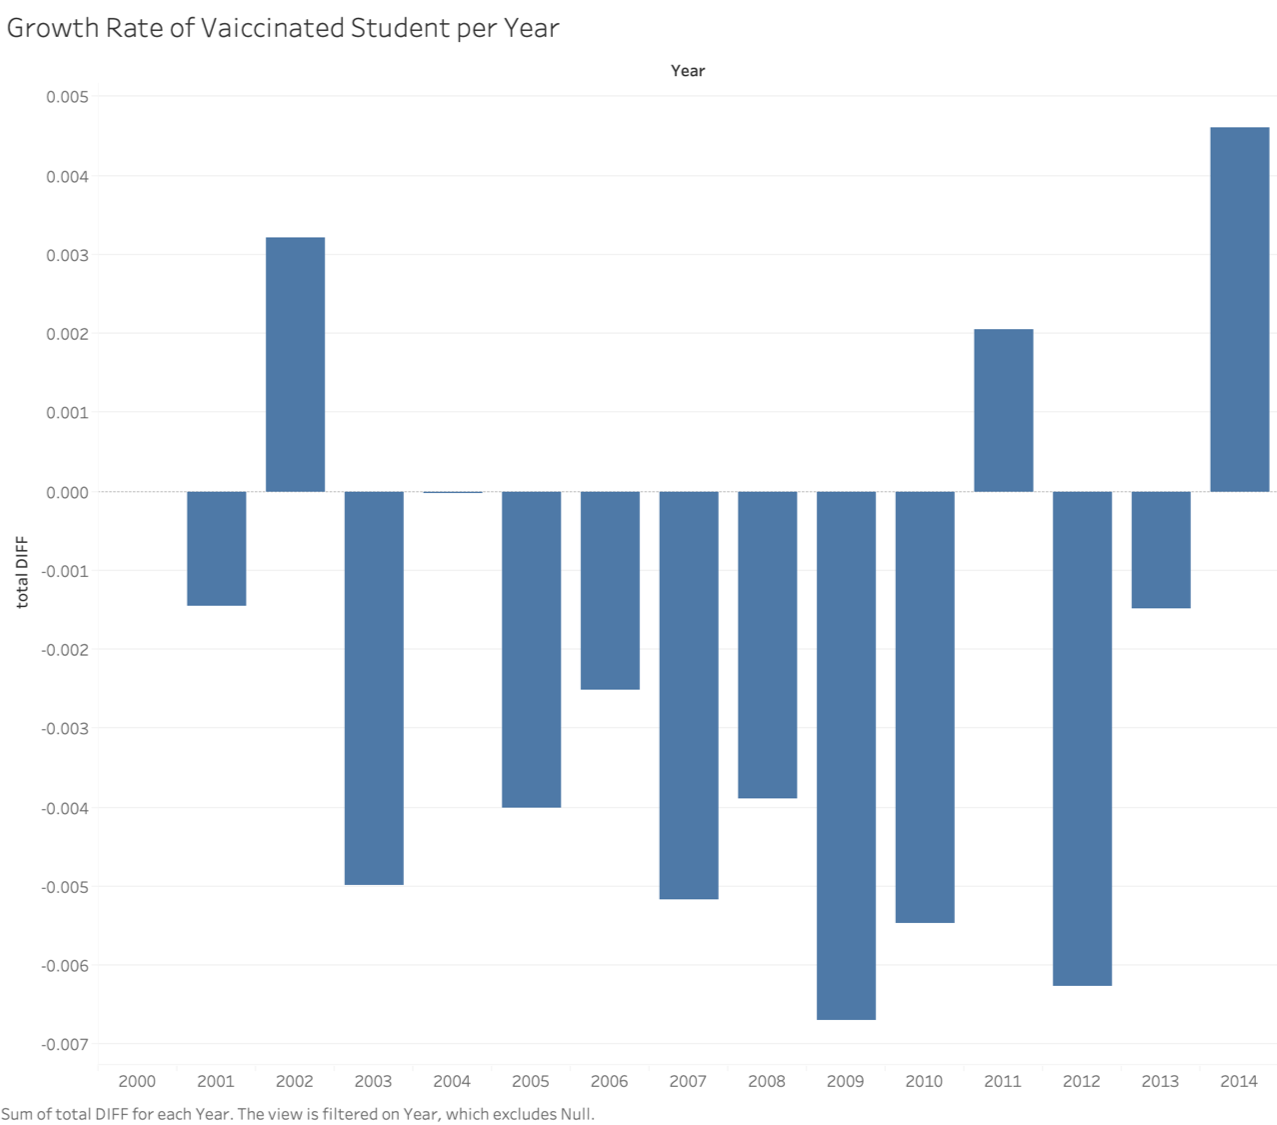

In [33]:
img = 'rate_total_stu_year.png'
Image(filename=img)

#### 4.2 Growth Rate  of Vaccinated Student per Vaccine Type per Year 

If we divide the vaccinator by its type. We can see their growth rate is relatively similar to each other. Except for MMR, that encounters an inflection point during 2006 to 2010. Before 2006, MMR grows fatser the decrease slower than the other two shot ( its line is above the other two), however, during 2006 to 2010, MMR encountered a persistent decrease in vaccinators despite a rebound in the other two types. After 2010, MMR's growth line is below the other two shot, meaning it grows slower and drops faster.


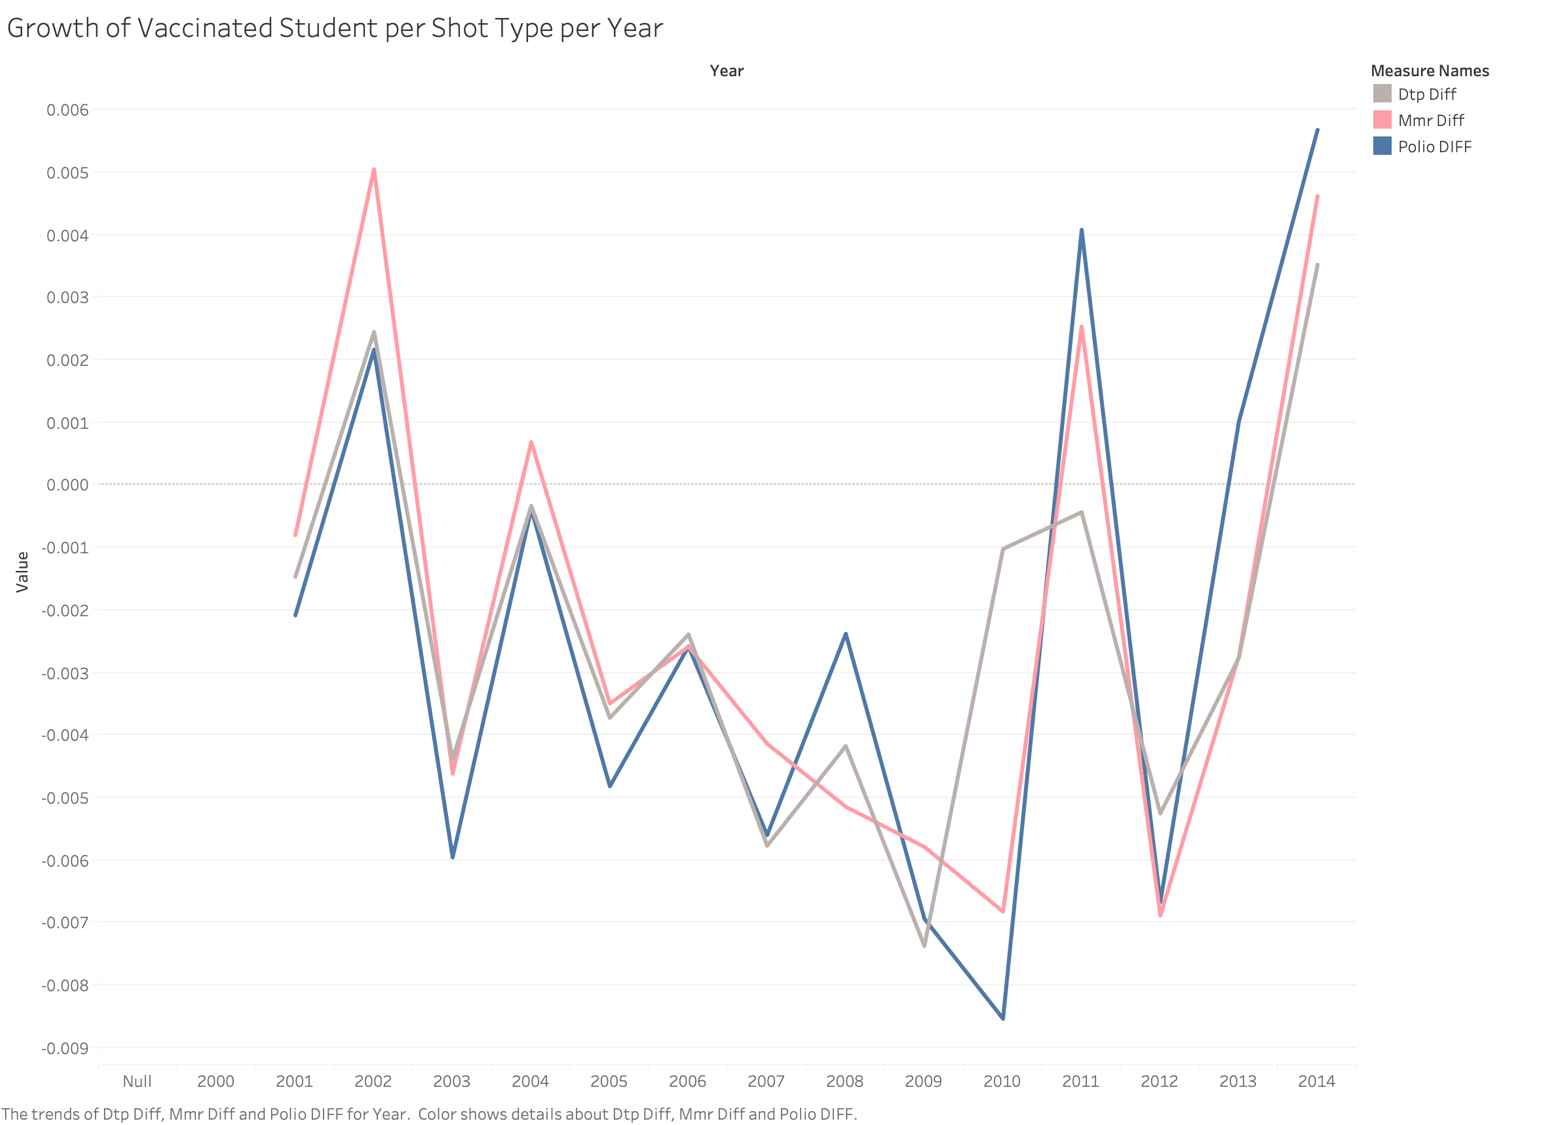

In [34]:
img = 'rate_stu_shot_year.png'
Image(filename=img)

#### 4.3 Growth Rate of Vaccinated Student per School Type per Year 

If we divide the growth rate on school type, we found that suprisinly, the public school has a more persistant negative growth than the private school. This is a sign that the public school is catching up with this anti-vaccine trend. However, the numerical value of dropping can be as deep as for private school is .015% whereas for public school is it on .006%. So in general, private school still has more student opting out of vaccination.

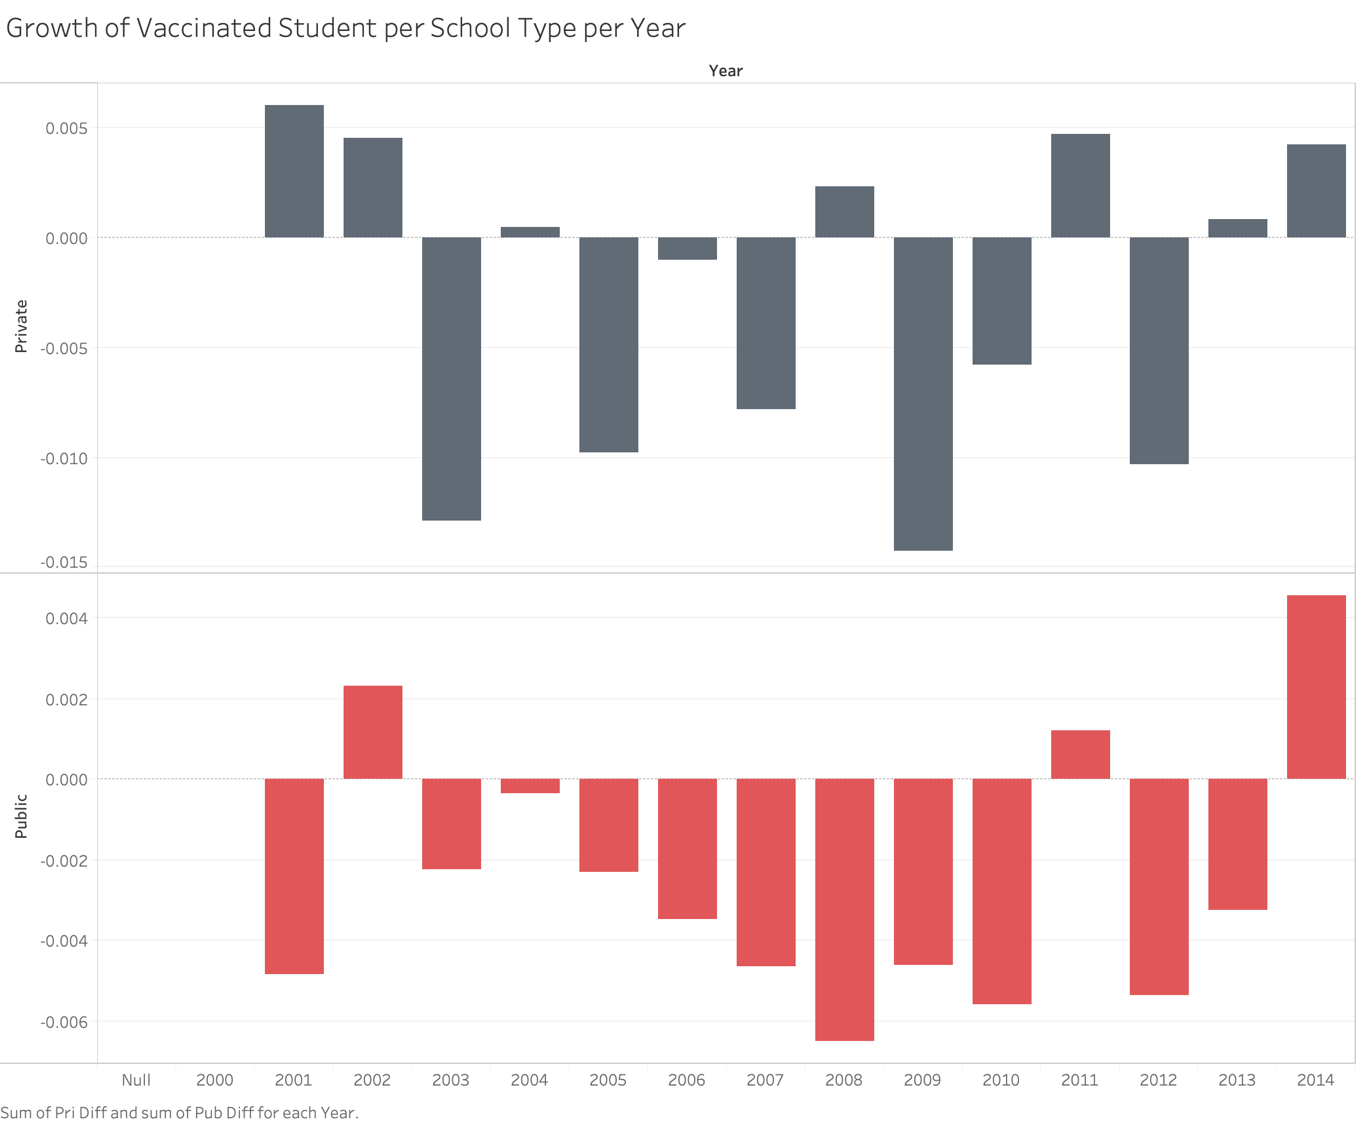

In [35]:
img = 'rate_stu_sch_year.png'
Image(filename=img)

# Conclusion
Anti-vaccination has been increasing since 2000 in Northern CA, most notably in private schools. Meanwhile, the public schools are catching up with the trend. More importantly, the Californian Kindergarten population has already dug below some of the herd immunity rate.


# Discussion
At this point the question of who and where are successfully answered. However, we still do not know the when. When does this anti-vaccine sentiment pick up attraction. The reason is simple. Looking at all the trend graphs we plotted. It is clear that our data scope only covers a small segment of a very long term trend. We therefore did a little more reserach on the subject matter.

The anti-vaccine movement specific to California can be traced back to as early as 1876, in which CA, WI, IL initiated
anti-vaccine movement.In 1955 Berkeley CA released 120, 000 bad Polio vaccine that caused 40,000 Polio cases, and also raised the questions from the public of whether vaccine is safe at all. In 1998 The nation-wide “Green Our Vaccines
movement” took place in response to the toxic vaccine controversy. Along which, was the long time worry that autism is associated with little kids taking the vaccine. The 1998 event was so influential, that even though no scientific proof was given on the toxicity of the vaccine, the Congree agreed to remove a few elements from the vaccine production. This gave the sign that vaccine is at least "improvable", and thus, not 100% safe for children. Follow from there, we have our trend graph started in 2000, where we see a constanly dropping of vaccinators.

However, what is the consequence of this dropping? Here, we need to introduce the herd immunity rate, which states that if a community's vaccone percetage drop below that herd immunity rate, the community is no longer immune to the disease. In other word, for a community that drops below the herd immunity rate, future children who does not take vaccines in that community will have very high chance of being affected. Measles, one of the rapidly dropping vaccinator we just talked about, has a herd immunity rate of 94%. If any communities have less than 94% people taking MMR vaccine, their unvaccined children is at great risk.In fact, Measles was once declared eliminated in the U.S. in 2000, but it is back in 2014, as indicated by the Califronia Disneyland outbreak.

We belive more research needs to be done to understand how has the anti vaccine movement evolve and where it will be heading to. But it is assured that the outcome of this movement is not desired. The Califronia government has already taken preventive measures by filly forbid personal exemption in school. Which is why see a rebound of vaccination rate and a decrease in personal belief exemption ussage in many graphs above.

/Users/audreyliu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


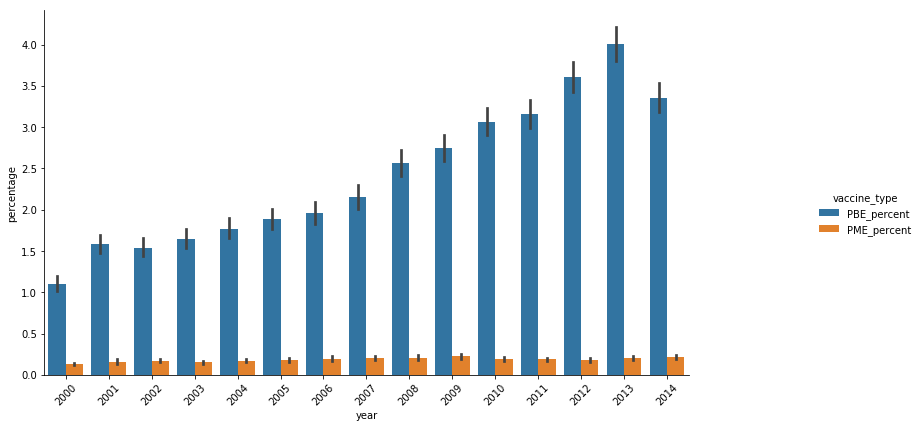

In [36]:
g = sns.catplot(x='year', y='percentage', hue='vaccine_type', data=melt_exemptions, kind='bar')
plt.xticks(rotation=45)

g.fig.set_figheight(6)
g.fig.set_figwidth(14)

plt.show()

However, we believe enforcing law is not enough. There were measles cases reported in the US in 2008, 2011, 2013, and 2014.  These cases did not appear to affect the fairly steady trend of growing personal belief exemptions. And even though the new state law saying that Personal Belief Exemptions would no longer be accepted and that exemptions must come from a doctor's note, recent news show that the parents would do their best to obtain medical exemptions from their doctors, even though the medical exemption is not warrented.( https://fee.org/articles/california-seeks-to-strip-doctors-of-authority-to-grant-kids-medical-exemptions-for-vaccinations/ )

We think more is needed to be done in studying what is causing the anit-vaccine sentiment and aggrevating it in the past years and any preventive measures should be built upon a better understanding on the anti-vaccine mentality. rather than simply restricted 

# Citations
1. California measles cases reach 38, with outbreaks expected to keep growing. (2019, April 25). Retrieved from https://www.latimes.com/local/california/la-me-ln-measles-increase-california-20190425-story.html.
2. CDC Statement Regarding 2004 Pediatrics Article, ‘Age at First Measles-Mumps-Rubella Vaccination in Children With Autism and School-Matched Control Subjects: A Population-Based Study in Metropolitan Atlanta’ Autism | Concerns | Vaccine Safety | CDC. (n.d.). Retrieved from  www.cdc.gov/vaccinesafety/concerns/autism/cdc2004pediatrics.html.
3. Cockman, P., Dawson, L., Mathur, R., & Hull, S. (2011, October 4). Improving MMR vaccination rates: herd immunity is a realistic goal. Retrieved from https://www.bmj.com/content/343/bmj.d5703.full.
4. Dales, L., Hammer, S. J., & Smith, N. J. (2001, March 7). Time Trends in Autism and in MMR Immunization Coverage in California. Retrieved from https://jamanetwork.com/journals/jama/fullarticle/193604.
5. Hussain, A., Ali, S., Ahmed, M., & Hussain, S. (2018, July 3). The Anti-vaccination Movement: A Regression in Modern Medicine. Retrieved from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6122668/.
6. Mandel, B. (2019, September 24). California's Dangerous, Bipartisan Anti-Vaccine Movement. Retrieved from https://www.nationalreview.com/2019/09/california-anti-vaccine-movement-bipartisan-dangerous/.
7. Measles | History of Measles | CDC. (n.d.). Retrieved from https://www.cdc.gov/measles/about/history.html.
8. Zipprich, J., Winter, K., & Xia, D. (2015, February 20). Measles Outbreak - California, December 2014–February 2015. Retrieved from https://www.cdc.gov/mmwr/preview/mmwrhtml/mm6406a5.htm.